# Loading libraries

In [46]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk import word_tokenize as tokenize
from nltk.tokenize import WhitespaceTokenizer
from collections import Counter
from nltk.corpus import stopwords

st = WhitespaceTokenizer()

stop_words = stopwords.words('english')

# Loading dataset

In [47]:
df = pd.read_csv('../data/lyrics_def_noDupl.csv')
df = df.drop('language', axis=1)
df.drop(df[df.year < 1968].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,song,year,artist,genre,lyrics
0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."


Inizialize a dictionary divided by genre

In [48]:
genres_list = df['genre'].unique()
genres = {}
#key: genre, value: dataframe containing only records grouped by genre
for genre in genres_list: 
    genres[genre] = df[df['genre'] == genre]

In [49]:
genres['Hip-Hop'].iloc[10]['lyrics']

"Comp-ton [5x]\nAh, Real Muthaphukkin G'z [4x]\nHey yo Dr. here's another proper track and it's phat\nWatch the sniper, time to pay the piper\nAnd let the real shit provoke\nSee you's a wanna be loc and you get smoked and I hope that your\nFans understand when you talk about preyin' me\nThe same records that your makin' is payin' me\nMuthafuck Dre, Muthafuck Snoop, Muthafuck Death Row\nYo and here comes my left blow\n'Cause I'm the E-A-Z-Y-E and this is the season\nTo let the real Muthaphuckkin G's in\nYou're like a kid you find the poop when you open up your diaper\nBut tell me where the fuck you find that anorexic rapper\nTalkin' about who you go squabble with and who you shoot\nYou're only 60 pounds when you're wet and wearin' boots\n[Gangsta Dresta]\nDamn E they tried to fade you on Dre Day\nBut Dre Day only make Eazy's payday\nAll of a sudden Dr. Dre is a G-Thang\nBut on his old album covers he was a she thang.\nSo nigga please, nigga please, don't step to these\nMuthaphuckkin Rea

# Side functions

In [50]:
#clean the text of the lyrics
def clean_lyric(full_lyric): 
  new_lyric =  ""
  new_lyric = re.sub("[^\x00-\x7F]+", " ", full_lyric) #remove non ASCII character
  new_lyric = re.sub("[\(\[].*?[\)\]]", ' ', new_lyric) #remove words between brackets
  new_lyric = re.sub("x[0-9]+", " ", new_lyric) #remove x2, x3, etc
  new_lyric = re.sub("[0-9]x+", " ", new_lyric) #remove 2x, 3x, ect
  new_lyric = re.sub("[^\w\s^']", " ", new_lyric) #remove puntuaction
  new_lyric = re.sub("\\n", " ", new_lyric) #remove /n
  new_lyric = re.sub(' {2,}', " ", new_lyric) #remove multiple white spaces
  return new_lyric

In [51]:
#function for plotting
import plotly.express as px
def crea_grafico(x, y, title, titleX, titleY):
    data = pd.DataFrame({titleX: x, titleY: y})
    fig = px.bar(data, x=titleX, y=titleY,labels=titleY,color=titleX)
    fig.update_layout(
        title={
        'text': title,
        "x": 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        font_family="Courier New",
        font_color="blue",
        title_font_color="blue",
        legend_title_font_color="green"
    )
    fig.show()

# Text cleaning & Tokenization

In [52]:
clean_lyrics = {} #it will contain the clean lyrics

#execute text cleaning
for genre in genres:
  clean_lyrics[genre] = []
  for lyric in genres[genre]['lyrics']:
    lyric = clean_lyric(lyric)
    clean_lyrics[genre].append(lyric)

In [53]:
clean_lyrics['Hip-Hop'][10]

"Comp ton Ah Real Muthaphukkin G'z Hey yo Dr here's another proper track and it's phat Watch the sniper time to pay the piper And let the real shit provoke See you's a wanna be loc and you get smoked and I hope that your Fans understand when you talk about preyin' me The same records that your makin' is payin' me Muthafuck Dre Muthafuck Snoop Muthafuck Death Row Yo and here comes my left blow 'Cause I'm the E A Z Y E and this is the season To let the real Muthaphuckkin G's in You're like a kid you find the poop when you open up your diaper But tell me where the fuck you find that anorexic rapper Talkin' about who you go squabble with and who you shoot You're only 60 pounds when you're wet and wearin' boots Damn E they tried to fade you on Dre Day But Dre Day only make Eazy's payday All of a sudden Dr Dre is a G Thang But on his old album covers he was a she thang So nigga please nigga please don't step to these Muthaphuckkin Real G's Every day it's a new rapper Claimin' to be deffer th

In [54]:
#defining custom stopwords
custom_stop_words = ["re","eh", "oh","la","ah","ve","s", "a", "im", "youre", "na", "ooh", "da", "yeah", "doo", "dee", "hey", "uh", "ba", "ha" ]

#### Whitespace tokenization and stop words removal.

The whitespace tokenization was chosen to hold terms like "gonna" or "wanna" that, with a classic tokenizer, would be divided like "gon" "na" and "wan" "na". Since the lyrics are full of slang, we decided to adopt this methodology.

In [55]:
tokenized_lyrics = {} #it will contain the tokenized lyrics
stop_words.extend(custom_stop_words)

for genre in clean_lyrics:
  tokenized_lyrics[genre] = []
  for lyric in clean_lyrics[genre]:
    lyric = re.sub("'", " ", lyric) #remove the apostrophes
    tokens = st.tokenize(lyric.lower()) #whitespace tokenizer
    final_lyric = []
    for token in tokens:
      if token not in stop_words:
        final_lyric.append(token)
    tokenized_lyrics[genre].append(final_lyric)

In [56]:
tokenized_lyrics['Hip-Hop'][10]

['comp',
 'ton',
 'real',
 'muthaphukkin',
 'g',
 'z',
 'yo',
 'dr',
 'another',
 'proper',
 'track',
 'phat',
 'watch',
 'sniper',
 'time',
 'pay',
 'piper',
 'let',
 'real',
 'shit',
 'provoke',
 'see',
 'wanna',
 'loc',
 'get',
 'smoked',
 'hope',
 'fans',
 'understand',
 'talk',
 'preyin',
 'records',
 'makin',
 'payin',
 'muthafuck',
 'dre',
 'muthafuck',
 'snoop',
 'muthafuck',
 'death',
 'row',
 'yo',
 'comes',
 'left',
 'blow',
 'cause',
 'e',
 'z',
 'e',
 'season',
 'let',
 'real',
 'muthaphuckkin',
 'g',
 'like',
 'kid',
 'find',
 'poop',
 'open',
 'diaper',
 'tell',
 'fuck',
 'find',
 'anorexic',
 'rapper',
 'talkin',
 'go',
 'squabble',
 'shoot',
 '60',
 'pounds',
 'wet',
 'wearin',
 'boots',
 'damn',
 'e',
 'tried',
 'fade',
 'dre',
 'day',
 'dre',
 'day',
 'make',
 'eazy',
 'payday',
 'sudden',
 'dr',
 'dre',
 'g',
 'thang',
 'old',
 'album',
 'covers',
 'thang',
 'nigga',
 'please',
 'nigga',
 'please',
 'step',
 'muthaphuckkin',
 'real',
 'g',
 'every',
 'day',
 'new',


# Text Analysis

1. Avarage tokens per lyric, per genre

In [57]:
#avarage tokens frequencies in lyrics per genre
freq_media_genere = {}
for genre in tokenized_lyrics:
  n = 0
  for lyric in tokenized_lyrics[genre]:
    n += len(lyric)
  freq_media_genere[genre] = n/len(tokenized_lyrics[genre])
  print(f'Total tokens in {genre}: {freq_media_genere[genre]}', end='\n')
  

Total tokens in Pop: 113.24719218331653
Total tokens in Hip-Hop: 249.7924228900129
Total tokens in Rock: 91.00882241827595
Total tokens in Metal: 89.34165940555717
Total tokens in Country: 89.53194396993509
Total tokens in Jazz: 86.24746534243741
Total tokens in Electronic: 96.94681368574672
Total tokens in Folk: 101.36186280679672
Total tokens in R&B: 102.10281741675814
Total tokens in Indie: 90.46344976593446


In [58]:
crea_grafico(freq_media_genere.keys(), freq_media_genere.values(),"Average lenght per lyric, per genre", "Genres", "Avg lenght")

2. Dictionary distribution per genre

Note: Hip-Hop, despite the number of lyrics, has the largest vocabulary. Probably due to the presence of many slang terms.

In [59]:
dictionary_per_lyric = {} #contains the set of token of each song of each genre
dictionary_per_genre = {}
for x, genre in enumerate(tokenized_lyrics):
  all_lyrics = []
  dictionary_per_lyric[genre] = {}
  for y, lyric in enumerate(tokenized_lyrics[genre]):
    dictionary_per_lyric[genre][y] = [len(set(lyric)),set(lyric)] #[len vocabulary of lyric, vocalbulary of lyric]
    all_lyrics.extend(lyric)
  dictionary_per_genre[genre] = set(all_lyrics) #[len vocabulary of genre, vocalbulary of genre]

Preparing data for plotting

In [60]:
total_len = [] #total vocabulary length of each genre
mean_len = [] #mean lenght of vocabulary per song of each genre
for genre in dictionary_per_lyric:
  total_len.append(len(dictionary_per_genre[genre]))
  tot = 0
  for id in dictionary_per_lyric[genre]:
    tot += dictionary_per_lyric[genre][id][0]
  mean_len.append(tot/len(dictionary_per_lyric[genre]))

In [61]:
crea_grafico(dictionary_per_genre.keys(), total_len, "Vocabulary per Genre", "Genres", "Vocaboulary lenght")

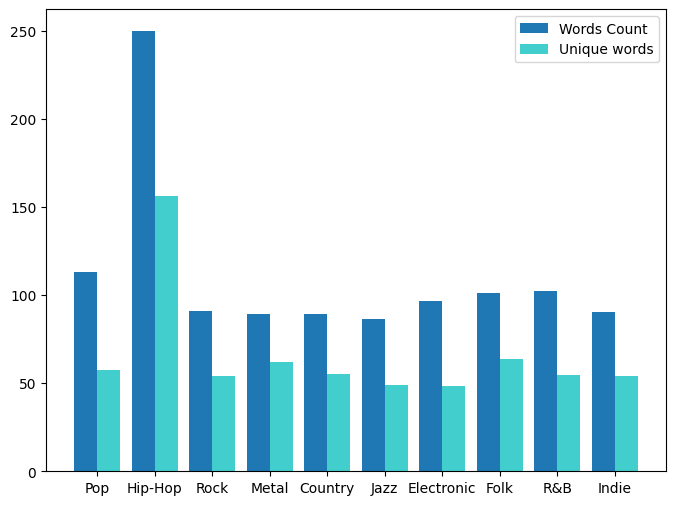

In [62]:
plt.figure(figsize=(8,6))
plt.bar(np.arange(len(freq_media_genere)) -0.2, list(freq_media_genere.values()), width=0.4, label='Words Count')
plt.bar(np.arange(len(dictionary_per_lyric)) +0.2, mean_len, width=0.4, label='Unique words', color='#43cece')
plt.xticks(range(len(freq_media_genere)), list(freq_media_genere.keys()))
plt.legend()
plt.show()

## Frequencies of unigram, bigram, trigram and collocations

### Unigrams

1. Create a unique list of tokens by genre. For example, the Pop genre will have a list of all tokens of all lyrics

In [63]:
tokenized_genres = {}
for genre in tokenized_lyrics:
  tokenized_genres[genre] = []
  for id, lyric in enumerate(tokenized_lyrics[genre]):
    for token in tokenized_lyrics[genre][id]:
      tokenized_genres[genre].append(token)

2. Compute frequencies

In [64]:
tokens_freq = {}
for genre in tokenized_genres:
  tokens_freq[genre] = Counter(tokenized_genres[genre])

3. 10 most frequent tokens

In [65]:
for genre in tokens_freq:
  best_words = sorted(tokens_freq[genre].items() ,key=lambda x: x[1], reverse=True)[:10]
  x = []
  y = []
  for tupla in best_words:
    x.append(tupla[0])
    y.append(tupla[1])
  crea_grafico(x, y, f"The ten most frequent tokens in {genre} ", "Token", "Frequency")

### Bigrams

1. Create a unique list of bigrams by genre. For example, the Pop genre will have a list of all bigrams of all lyrics

In [66]:
genre_bigram = {}
for genre in tokenized_genres:
  genre_bigram[genre] = list(ngrams(tokenized_genres[genre], 2))

2. Compute bigram frequencies

In [67]:
bigram_freq = {}
for genre in genre_bigram:
  bigram_freq[genre] = Counter(genre_bigram[genre])

3. 10 most frequent bigrams

In [68]:
for genre in bigram_freq:
  best_ngram = sorted(bigram_freq[genre].items() ,key=lambda x: x[1], reverse=True)[:10]
  x = []
  y = []
  for tupla in best_ngram:
    x.append(" ".join(tupla[0]))
    y.append(tupla[1])
  crea_grafico(x, y, f"The ten most frequent bigrams in {genre} ", "Bigram", "Frequency")

### Trigrams

1. Create a unique list of trigrams by genre. For example, the Pop genre will have a list of all trigrams of all lyrics

In [69]:
genre_trigram = {}
for genre in tokenized_genres:
  genre_trigram[genre] = list(ngrams(tokenized_genres[genre], 3))

2. Compute frequencies

In [70]:
trigram_freq = {}
for genre in genre_trigram:
  trigram_freq[genre] = Counter(genre_trigram[genre])

3. 10 most frequent trigrams

In [71]:
for genre in trigram_freq:
  best_ngram = sorted(trigram_freq[genre].items() ,key=lambda x: x[1], reverse=True)[:10]
  x = []
  y = []
  for tupla in best_ngram:
    x.append(" ".join(tupla[0]))
    y.append(tupla[1])
  crea_grafico(x, y, f"The ten most frequent trigrams in {genre} ", "Trigram", "Frequency")

### Collocations

Note: The "heavier" collocations contain, for the most part, proper names of people or places.

We have not printed the various plots because they are not very informative

In [72]:
from gensim.models.phrases import Phraser, Phrases, ENGLISH_CONNECTOR_WORDS

In [73]:
col_bigram = {}
for genre in tokenized_lyrics:
  col_bigram[genre] = Phraser(Phrases(tokenized_lyrics[genre], connector_words=ENGLISH_CONNECTOR_WORDS))

In [74]:
col_bigram['Hip-Hop'].phrasegrams

{'already_know': 12.935792001067005,
 'pocket_fulla': 223.11785435114112,
 'eazy_e': 214.2859533967837,
 'hittin_corners': 98.61937559472562,
 'low_key': 86.66453324933585,
 'george_bush': 962.1710875331564,
 'well_known': 15.671109092303068,
 'god_knows': 19.51793979228525,
 'grown_men': 58.95719346614937,
 'forty_five': 99.91988709819593,
 'say_hi': 15.951616439470289,
 'bad_guy': 26.287869422719318,
 'aint_stoppin': 22.716020390270785,
 'fast_cars': 34.77634491971117,
 'verse_1': 165.1278791715939,
 'brass_monkey': 1234.64431586113,
 '8_ball': 59.07985602136877,
 'bass_drum': 67.43315458315459,
 'six_shooter': 62.25489130434783,
 'kick_dust': 15.365392354124749,
 '40_ounce': 195.95381231671553,
 'marvin_gaye': 18163.95469448584,
 'greatest_hits': 43.59815906370661,
 'east_side': 107.1481342499803,
 'verse_2': 114.63854470667063,
 'verse_3': 115.18753101609056,
 'title_holdin': 36.294820340641266,
 'holdin_eazy': 12.428226359068068,
 '5_0': 324.99692196531794,
 'ounce_hand': 17.02843

In [75]:
sorted(col_bigram['Hip-Hop'].phrasegrams.items() ,key=lambda x: x[1], reverse=True)[:10]

[('helter_skelter', 103026.31952662722),
 ('kera_mogo', 102020.203125),
 ('aleister_crowley', 102020.203125),
 ('aibe_soin', 102020.203125),
 ('itsy_bitsy', 97660.36538461539),
 ('republica_dominicana', 90684.625),
 ('mazel_tov', 88833.91836734694),
 ('afrodisiac_disiac', 88833.91836734694),
 ('feng_shui', 88833.91836734694),
 ('izl_nizl', 87325.93518518518)]